In [2]:
import pandas as pd
from bs4 import BeautifulSoup

from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import logging  # Setting up the loggings to monitor gensim
import re
import unicodedata as ud

d = {ord('\N{COMBINING ACUTE ACCENT}'):None}

# Read html file
def read_file(file_path: str) -> list:
    with open(file_path, 'r') as file:
        html_content = file.read()
    soup = BeautifulSoup(html_content, 'html.parser')
    text = soup.get_text()
    list_words = text.replace('\n', ' ').split(' ')
    return list_words


In [3]:
import os

files = os.listdir('./final_dataset_efeteio')
files = [f for f in files if f.endswith('.html')]

df = pd.DataFrame(columns=['script'])
for f in files:
    list_words = read_file(f'./final_dataset_efeteio/{f}')
    script = ' '.join(list_words)
    df.loc[f] = script    

df.sort_index(inplace=True)
df.head()

,script
1004.html,αριθμος αποφασης αριθμος αποφασης αριθμο...
1006.html,αριθμος αποφασης αριθμος αποφασης εφετει...
1008.html,αριθμος αποφασης αριθμος αποφασης εφετει...
1010.html,αριθμος αποφασης αριθμος αποφασης εφετει...
1012.html,αριθμος αποφασης αριθμος αποφασης εφετει...


In [4]:
df.shape

(3498, 1)

In [5]:
decisions = pd.read_csv('./preprocessed_efeteio/annotated_dataset.csv')    
decisions = decisions[decisions['Decision'].isin(df.index)]
decisions.set_index('Decision', inplace=True)
decisions.sort_index(inplace=True)
decisions.head()

,Label
Decision,
1004.html,1
1006.html,1
1008.html,1
1010.html,1
1012.html,0


In [18]:
decisions

,Label
Decision,
1004.html,1
1006.html,1
1008.html,1
1010.html,1
1012.html,0
...,...
9686.html,0
9688.html,1
969.html,1


In [27]:
decisions.value_counts()

Label
1        3101
0         397
Name: count, dtype: int64

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata

def preprocess_text(file_path):
    with open(file_path, 'r') as file:
        # Read the text from the file
        text = file.read()
        # Convert to lowercase
        text = text.lower()
        # Remove accents
        text = ''.join(char for char in unicodedata.normalize('NFKD', text) if not unicodedata.combining(char))
        # Remove punctuations
        text = re.sub(r'[^\w\s]', '', text)
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Remove English characters
        text = re.sub(r'[a-zA-Z]', '', text)
        # Remove all special chars
        text = text.replace('_', '')
        # Transforn to list of words
        text = text.replace('\n', ' ').split(' ')
    return text

# Example usage:
stop_words = preprocess_text('stopwords.txt')
    
tfidf = TfidfVectorizer(norm='l2', stop_words=stop_words, max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['script']).toarray()

data = pd.DataFrame(tfidf_matrix, index=df.index, columns=tfidf.get_feature_names_out())
data['target'] = decisions['Label'].values

In [9]:
stop_words

['αδιακοπα',
 'αι',
 'ακομα',
 'ακομη',
 'ακριβως',
 'αληθεια',
 'αληθινα',
 'αλλα',
 'αλλαχου',
 'αλλες',
 'αλλη',
 'αλλην',
 'αλλης',
 'αλλιως',
 'αλλιωτικα',
 'αλλο',
 'αλλοι',
 'αλλοιως',
 'αλλοιωτικα',
 'αλλον',
 'αλλος',
 'αλλοτε',
 'αλλου',
 'αλλους',
 'αλλων',
 'αμα',
 'αμεσα',
 'αμεσως',
 'αν',
 'ανα',
 'αναμεσα',
 'αναμεταξυ',
 'ανευ',
 'αντι',
 'αντιπερα',
 'αντις',
 'ανω',
 'ανωτερω',
 'αξαφνα',
 'απ',
 'απεναντι',
 'απο',
 'αποψε',
 'αρα',
 'αραγε',
 'αργα',
 'αργοτερο',
 'αριστερα',
 'αρκετα',
 'αρχικα',
 'ας',
 'αυριο',
 'αυτα',
 'αυτες',
 'αυτη',
 'αυτην',
 'αυτης',
 'αυτο',
 'αυτοι',
 'αυτον',
 'αυτος',
 'αυτου',
 'αυτους',
 'αυτων',
 'αφοτου',
 'αφου',
 'βεβαια',
 'βεβαιοτατα',
 'γι',
 'για',
 'γρηγορα',
 'γυρω',
 'δα',
 'δε',
 'δεινα',
 'δεν',
 'δεξια',
 'δηθεν',
 'δηλαδη',
 'δι',
 'δια',
 'διαρκως',
 'δικα',
 'δικο',
 'δικοι',
 'δικος',
 'δικου',
 'δικους',
 'διολου',
 'διπλα',
 'διχως',
 'εαν',
 'εαυτο',
 'εαυτον',
 'εαυτου',
 'εαυτους',
 'εαυτων',
 'εγκαιρα',
 'εγ

In [10]:
data

,αα,αβασιμα,αβασιμες,αβασιμη,αβασιμης,αβασιμο,αβασιμοι,αβασιμος,αβασιμου,αβασιμων,...,ωραριο,ωραριου,ωρας,ωρες,ωρομισθιο,ωρομισθιου,ωρων,ωφελεια,ωφελειας,target
1004.html,0.0,0.000000,0.0,0.006848,0.0,0.000000,0.000000,0.038918,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1
1006.html,0.0,0.000000,0.0,0.028127,0.0,0.000000,0.082224,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1
1008.html,0.0,0.000000,0.0,0.002133,0.0,0.000000,0.000000,0.002425,0.003964,0.004171,...,0.032918,0.009783,0.010091,0.032356,0.0,0.0,0.017681,0.0,0.000000,1
1010.html,0.0,0.000000,0.0,0.007666,0.0,0.000000,0.000000,0.008713,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1
1012.html,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.008460,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.025085,0.0,0.0,0.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9686.html,0.0,0.000000,0.0,0.013123,0.0,0.011145,0.000000,0.000000,0.012193,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
9688.html,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.023856,0.009750,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1
969.html,0.0,0.000000,0.0,0.030207,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1
9690.html,0.0,0.000000,0.0,0.008471,0.0,0.007194,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1


Train shape: (2343, 5000) | Test shape: (1155, 5000)


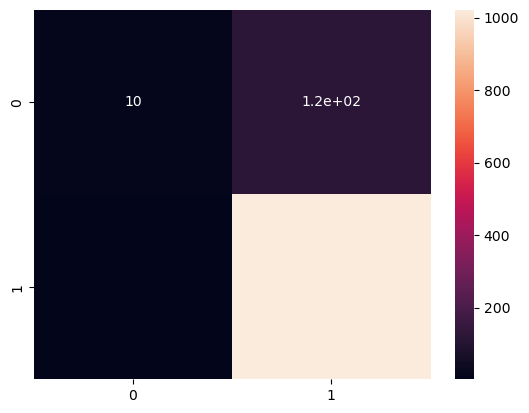

Accuracy: 0.8935064935064935
MCC: 0.943239501615136


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
print(f'Train shape: {X_train.shape} | Test shape: {X_test.shape}')

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Confusion matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

print(f'Accuracy: {rf.score(X_test, y_test)}')

# Calculate MCC
from sklearn.metrics import matthews_corrcoef, f1_score

mcc = f1_score(y_test, y_pred)
print(f'MCC: {mcc}')

In [46]:
X_train

,script
576.html,αριθμος αποφασης αριθμος αποφασης αριθμο...
4201.html,αριθμος αποφασης αριθμος αποφασης αριθμ...
5079.html,αριθμος αποφασης αριθμος αποφασης εφετει...
7608.html,αριθμος αποφασης αριθμος αποφασης εφετει...
6307.html,αριθμος αποφασης αριθμος αποφασης περιλη...
...,...
509.html,αριθμος αποφασης αριθμος αποφασης εφετει...
7639.html,αριθμος αποφασης αριθμος αποφασης αριθμο...
1783.html,αριθμος αποφασης αριθμος αποφασης εφετει...
6317.html,αριθμος αποφασης αριθμος αποφασης αριθμο...


In [12]:
cm

array([[  10,  121],
       [   2, 1022]])

In [13]:
y

1004.html    1
1006.html    1
1008.html    1
1010.html    1
1012.html    0
            ..
9686.html    0
9688.html    1
969.html     1
9690.html    1
997.html     1
Name: target, Length: 3498, dtype: int64

In [22]:
decisions

,Label
Decision,
1004.html,1
1006.html,1
1008.html,1
1010.html,1
1012.html,0
...,...
9686.html,0
9688.html,1
969.html,1


In [41]:
df['Label'] = decisions['Label'].values

df_0 = df[df['Label'] == 0]
df_1 = df[df['Label'] == 1]

df_0_sample = df_0.sample(380)
df_1_sample = df_1.sample(380)

df_resampled = pd.concat([df_0_sample, df_1_sample])
df_resampled['Label'].value_counts()

Label
0    380
1    380
Name: count, dtype: int64

In [56]:
df_resampled

,script,Label
4114.html,αριθμος αποφασης αριθμος αποφασης αριθμο...,0
5401.html,αριθμος αποφασης αριθμος αποφασης αριθμο...,0
7947.html,αριθμος αποφασης αριθμος αποφασης αριθμο...,0
8464.html,αριθμος αποφασης αριθμος αποφασης αριθμο...,0
4750.html,αριθμος αποφασης αριθμος αποφασης ελληνι...,0
...,...,...
1071.html,αριθμος αποφασης αριθμος αποφασης αριθμο...,1
7943.html,αριθμος αποφασης αριθμος αποφασης μονομε...,1
1363.html,αριθμος αποφασης αριθμος αποφασης μονομε...,1
3559.html,αριθμος αποφασης αριθμος αποφασης αριθμο...,1


In [57]:
tfidf = TfidfVectorizer(norm='l2', stop_words=stop_words, max_features=5000)
tfidf_matrix = tfidf.fit_transform(df_resampled['script']).toarray()

data_resampled = pd.DataFrame(tfidf_matrix, index=df_resampled.index, columns=tfidf.get_feature_names_out())
data_resampled['Label'] = df_resampled['Label'].values

Train shape: (509, 5000) | Test shape: (251, 5000)


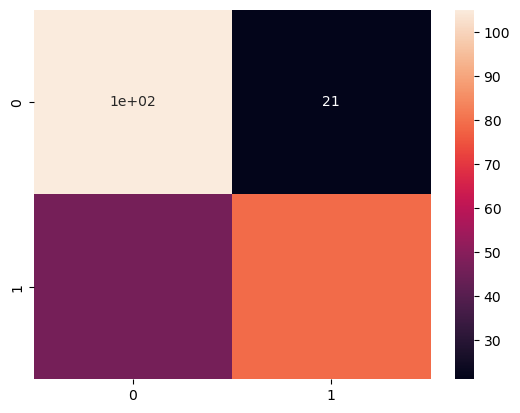

Accuracy: 0.7330677290836654
MCC: 0.7022222222222222


In [59]:
X = data_resampled.drop('Label', axis=1)
y = data_resampled['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
print(f'Train shape: {X_train.shape} | Test shape: {X_test.shape}')

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Confusion matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

print(f'Accuracy: {rf.score(X_test, y_test)}')

# Calculate MCC
from sklearn.metrics import matthews_corrcoef, f1_score

mcc = f1_score(y_test, y_pred)
print(f'MCC: {mcc}')

In [60]:
cm

array([[105,  21],
       [ 46,  79]])